<a href="https://colab.research.google.com/github/Aniketjichkar/Playstore_eda/blob/main/Copy_of_Copy_of_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [ ]:
Playstore_data = pd.read_csv("/content/Play Store Data.csv")

In [ ]:
Playstore_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Tasks**
# 1. Data clean up – Missing value treatment   
a. Drop records where rating is missing since rating is our target/study variable

In [ ]:
Playstore_data.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [ ]:
data1 = Playstore_data['Rating'].dropna(axis = 0)
data1

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9367, dtype: float64

In [ ]:
data1.isnull().sum()

0


# b. Check the null values for the Android Ver column.

In [ ]:
Playstore_data['Android Ver'].isnull().sum()

3

In [ ]:
Playstore_data.loc[Playstore_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


i. Are all 3 records having the same problem? 




Yes, all 3 records are having same problem ie all are NaN.




ii. Drop the 3rd record i.e. record for “Life Made WIFI …”





In [ ]:
Playstore_data.drop(([10472]),inplace = True)

In [ ]:
Playstore_data.loc[Playstore_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


 iii. Replace remaining missing values with the mode

In [ ]:
Playstore_data['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [ ]:
Playstore_data['Android Ver'].fillna(Playstore_data['Android Ver'].mode()[0],inplace = True)

# c. Current ver – replace with most common value

In [ ]:

Playstore_data['Current Ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 10840, dtype: object

In [ ]:
Playstore_data['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [ ]:
Playstore_data['Current Ver'].fillna(Playstore_data['Current Ver'].mode()[0], inplace=True)

# 2. Data clean up – correcting the data types
**a. Which all variables need to be brought to numeric types?**   
Reviews and installs need to be brought to numeric types.   

**b. Price variable – remove $ sign and convert to float**

In [ ]:
Playstore_data['Price'] = [x.strip('$') for x in Playstore_data['Price']]

In [ ]:

Playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
Playstore_data['Price'] = Playstore_data['Price'].astype('float')

**c. Installs – remove ‘,’ and ‘+’ sign, convert to integer**

In [ ]:

Playstore_data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [ ]:
Playstore_data['Installs'].str.replace(',','').str.replace('+','')

<ipython-input-24-c9ca19ed6fc9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Playstore_data['Installs'].str.replace(',','').str.replace('+','')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [ ]:
Playstore_data['Installs'] = Playstore_data['Installs'].str.replace(',','').str.replace('+','').astype('int64')

<ipython-input-25-68d65c39c68f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Playstore_data['Installs'] = Playstore_data['Installs'].str.replace(',','').str.replace('+','').astype('int64')


**d. Convert all other identified columns to numeric**

In [ ]:
Playstore_data['Reviews']= Playstore_data['Reviews'].astype('int64')
Playstore_data['Reviews'].dtypes

dtype('int64')

# 3. Sanity checks – check for the following and handle accordingly
**a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.**    
*i. Are there any such records? Drop if so.*

In [ ]:

Playstore_data.loc[Playstore_data.Rating < 1] & Playstore_data.loc[Playstore_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 or greater than 5.

**b. Reviews should not be more than installs as only those who installed can review the app.**

**i. Are there any such records? Drop if so.**

Yes, there are 7 records where Review is greater than Installs.

In [ ]:
Playstore_data['Reviews'].dtypes

dtype('int64')

In [ ]:

Playstore_data['Installs'].dtypes

dtype('int64')

In [ ]:

Playstore_data.loc[Playstore_data['Reviews'] > Playstore_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4,64M,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2,238k,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11,2.0M,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14,47M,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [ ]:
Drop = Playstore_data[Playstore_data['Reviews'] > Playstore_data['Installs']].index
Playstore_data.drop(labels=Drop, inplace=True)

In [ ]:

Playstore_data.loc[Playstore_data['Reviews'] > Playstore_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers –¶

**a. Price column**

**i. Make suitable plot to identify outliers in price**

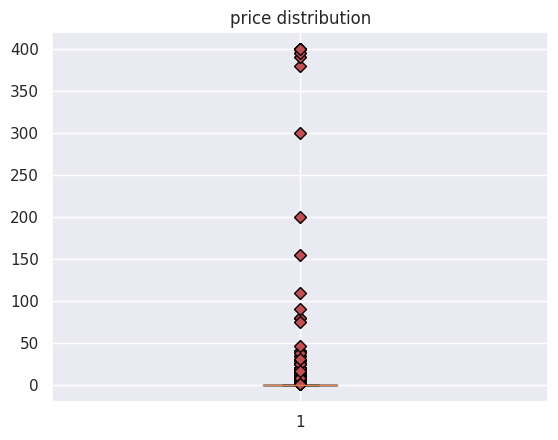

In [ ]:
red_diamond = dict(markerfacecolor='r', marker='D')

plt.title("price distribution")
plt.boxplot(Playstore_data['Price'],flierprops=red_diamond)
plt.show()    


**ii. Do you expect apps on the play store to cost $200? Check out these cases**

In [ ]:
print('Yes we can expect apps on the play store to cost $200')
Playstore_data.loc[Playstore_data['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


**iv. Limit data to records with price < $30**

In [ ]:
limit_30 = Playstore_data[Playstore_data['Price'] > 30].index
Playstore_data.drop(labels=limit_30, inplace=True)

In [ ]:
count_limit30 = Playstore_data.loc[Playstore_data['Price'] > 30].index
count_limit30.value_counts().sum()

0

**iii. After dropping the useless records, make the suitable plot again to identify outliers**

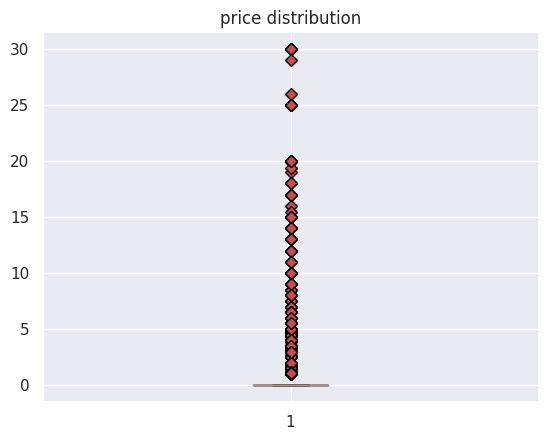

In [ ]:
red_diamond = dict(markerfacecolor='r', marker='D')

plt.title("price distribution")
plt.boxplot(Playstore_data['Price'],flierprops=red_diamond)
plt.show() 

**b. Reviews column**

**i. Make suitable plot ** 

<ipython-input-38-aa2d15b389a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Playstore_data['Reviews'])


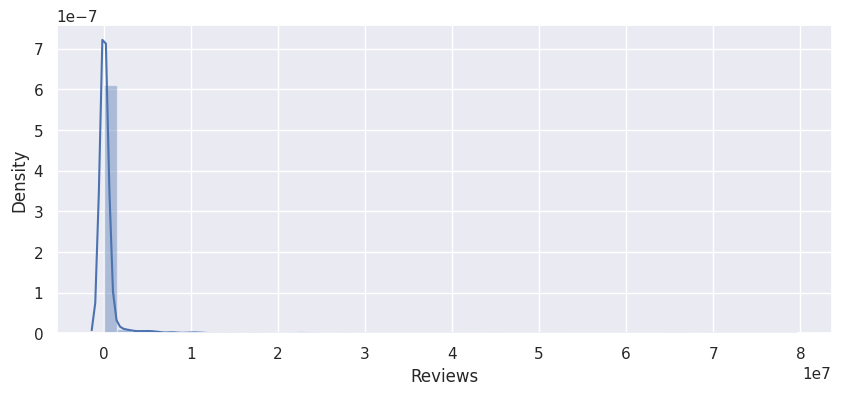

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(Playstore_data['Reviews'])
plt.show()

**ii. Limit data to apps with < 1 Million reviews**

In [ ]:
Limit_1M = Playstore_data[Playstore_data['Reviews'] > 1000000 ].index
Playstore_data.drop(labels = Limit_1M, inplace=True)
print(Limit_1M.value_counts().sum(),'Record dropped')

704 Record dropped


**c.** **Installs**

**i. What is the 95th percentile of the installs?**

In [ ]:
percentile = Playstore_data.Installs.quantile(0.95)
percentile

10000000.0

**ii. Drop records having a value more than the 95th percentile**


In [ ]:
drop_percentile = Playstore_data['Installs'].loc[Playstore_data['Installs'] > percentile].index
Playstore_data.drop(labels = drop_percentile, inplace = True)
print(drop_percentile.value_counts().sum(),'Record dropped')

199 Record dropped


# Data analysis to answer business questions
**5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?**

**a. How do you explain this?**

<ipython-input-42-a78548f2642f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Playstore_data['Rating'])


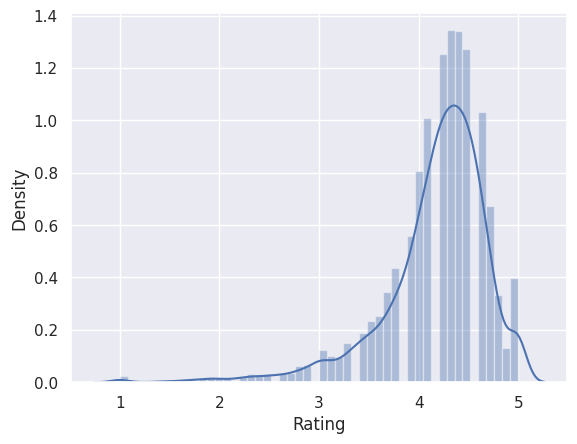

In [ ]:
sns.distplot(Playstore_data['Rating'])
plt.show()

In [ ]:
print('The skewness of this distribution is',Playstore_data['Rating'].skew())

The skewness of this distribution is -1.743427033064799


In [ ]:
print('The Median of this distribution {} which is greater than mean {} of this distribution'.format(Playstore_data.Rating.median(),
                                                                                               Playstore_data.Rating.mean()))

The Median of this distribution 4.3 which is greater than mean 4.170800237107292 of this distribution



**b. What is the implication of this on your analysis?**

In [ ]:
Playstore_data['Rating'].mode()

0    4.3
Name: Rating, dtype: float64

**Since mode>= median > mean, the distribution of Rating is Negatively Skewed.**

**Therefore distribution of Rating is more Skewed towards lower values**



# 6. What are the top Content Rating values?


In [ ]:

Playstore_data['Content Rating'].value_counts()

Everyone           8062
Teen               1024
Mature 17+          455
Everyone 10+        349
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**a. Are there any values with very few records?**

Adults only 18+ and Unrated are values with very few records so we drop them.


**b. If yes, drop those as they won’t help in the analysis**

In [ ]:
df = []
for k in Playstore_data['Content Rating']:
    df.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

Playstore_data['Content Rating']=df

In [ ]:
drop_NaN = Playstore_data[Playstore_data["Content Rating"] == 'NaN'].index
Playstore_data.drop(labels=drop_NaN, inplace=True)
print('droped cols',drop_NaN)

droped cols Int64Index([298, 3043, 6424, 7312, 8266], dtype='int64')


In [ ]:
Playstore_data['Content Rating'].value_counts()

Everyone        8062
Teen            1024
Mature 17+       455
Everyone 10+     349
Name: Content Rating, dtype: int64

# 7. Effect of size on rating



**a. Make a joinplot to understand the effect of size on rating**

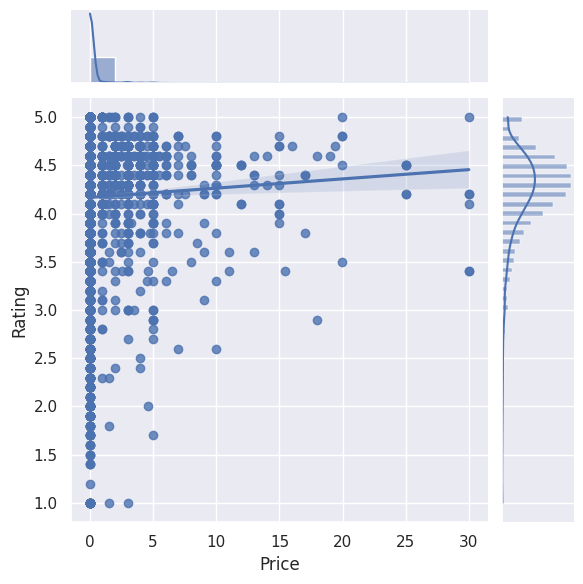

In [ ]:
sns.jointplot(x='Price', y='Rating', data=Playstore_data, kind='reg')
plt.show()


**b. What pattern do you see?**

Generally on increasing the Price, Rating remains almost constant greater than 4.

**c. How do you explain the pattern?**

Since on increasing the Price, Rating remains almost constant greater than 4.  
Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [ ]:

Playstore_data.corr()

<ipython-input-53-72dfda828d16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Playstore_data.corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.158547,0.118414,0.031479
Reviews,0.158547,1.000000,0.744276,-0.067072
Installs,0.118414,0.744276,1.000000,-0.099462
Price,0.031479,-0.067072,-0.099462,1.000000


**d. Replot the data, this time with only records with price > 0**

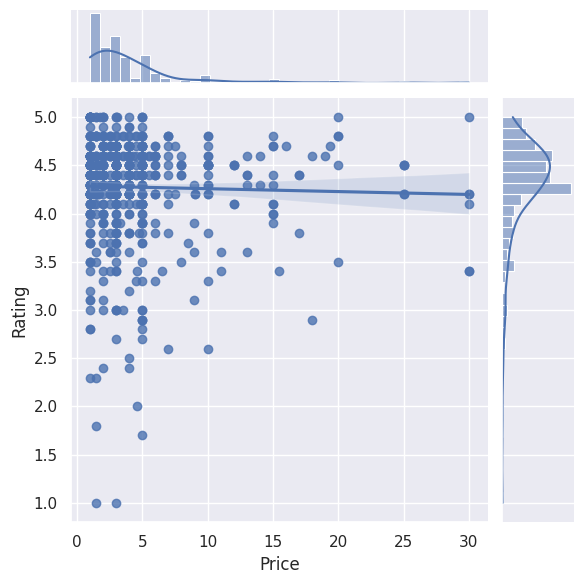

In [ ]:
Playstore=Playstore_data.loc[Playstore_data.Price>0]
sns.jointplot(x='Price', y='Rating', data=Playstore, kind='reg')
plt.show()

**e. Does the pattern change?**

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [ ]:

Playstore.corr()

<ipython-input-55-b07ae995e2c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Playstore.corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.095986,0.063960,-0.025975
Reviews,0.095986,1.000000,0.789193,-0.040737
Installs,0.063960,0.789193,1.000000,-0.048500
Price,-0.025975,-0.040737,-0.048500,1.000000


**f. What is your overall inference on the effect of price on the rating**

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating.
For Higher Price,Rating is High and almost constant ie greater than 4

# 9. Rating vs. content rating

**a. Make a bar plot displaying the rating for each content rating**

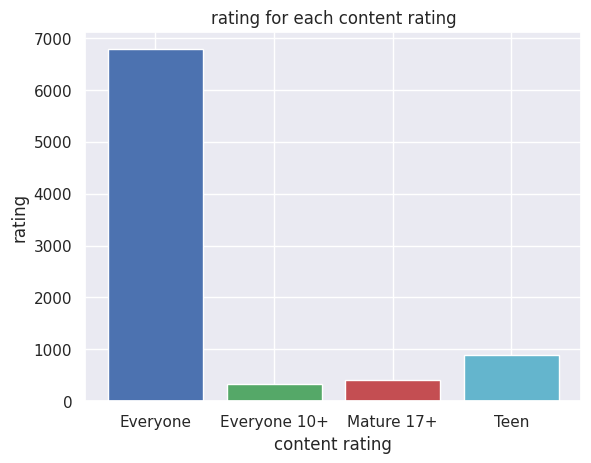

In [ ]:
Rating_content = Playstore_data.groupby(['Content Rating'])['Rating'].count()


x = Rating_content.index.tolist()
y = Rating_content.values.tolist()

plt.xlabel('content rating')
plt.ylabel('rating')

plt.title('rating for each content rating')

plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['b', 'g', 'r','c'])
plt.show()


**b. Which metric would you use? Mean? Median? Some other quantile?**


We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.


**c. Choose the right metric and plot**

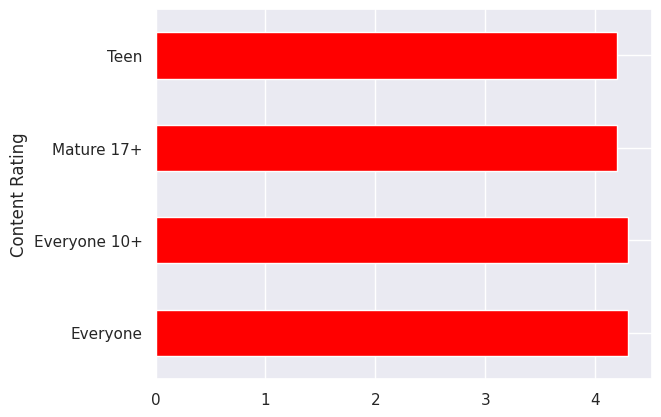

In [ ]:
Playstore_data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="Red")
plt.show()

In [ ]:

Playstore_data = Playstore_data.dropna(axis = 0)